# Optimization Algorithms

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import scipy
from utils import *
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

df_cancer = pd.DataFrame(data.data,columns=data.feature_names)
df_cancer['target'] = pd.Series(data.target)
X = df_cancer.iloc[:,:-1].values
y = df_cancer.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = X_train.T,X_test.T,y_train.T,y_test.T


y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

print(X_train.shape)
print(y_train.shape)

(30, 455)
(1, 455)


In [3]:
def update_params_gd(params,grads,lr):
    L = len(params)//2
    for l in range(L):
        params['W'+str(l+1)] = params['W'+str(l+1)] - lr*grads['dW'+str(l+1)]
        params['b'+str(l+1)] = params['b'+str(l+1)] - lr*grads['db'+str(l+1)]
    return params

In [4]:
import math
def random_mini_batches(X, Y, mini_batch_size = 64):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
def initialize_velocity(parameters):
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l+1)])
        
        
    return v

In [6]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        v["dW" + str(l + 1)] = beta * v["dW" + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta * v["db" + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v["db" + str(l + 1)]
        #
        
    return parameters, v

In [7]:
def initialize_adam(parameters) :
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    for l in range(L):
    
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
    
    
    return v, s

In [8]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    for l in range(L):
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
        
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))
        
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)
        
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))
        
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / np.sqrt(s_corrected["dW" + str(l + 1)] + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / np.sqrt(s_corrected["db" + str(l + 1)] + epsilon)
        

    return parameters, v, s

In [9]:
def model(X, Y,layers_dims, optimizer, learning_rate=0.0007, mini_batch_size=64, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=10000, print_cost=True):
    
    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
                          # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters_deep(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        minibatches = random_mini_batches(X, Y, mini_batch_size)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            

            # Forward propagation
            a3, caches = L_model_forward(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(a3, minibatch_Y)
            

            # Backward propagation
            grads = L_model_backward(a3, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_params_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

# Mini Batch Gradient Descent

Cost after epoch 0: 0.692589
Cost after epoch 1000: 0.336149
Cost after epoch 2000: 0.151115
Cost after epoch 3000: 0.112022
Cost after epoch 4000: 0.210017
Cost after epoch 5000: 0.324787
Cost after epoch 6000: 0.039675
Cost after epoch 7000: 0.068885
Cost after epoch 8000: 0.111256
Cost after epoch 9000: 0.480585


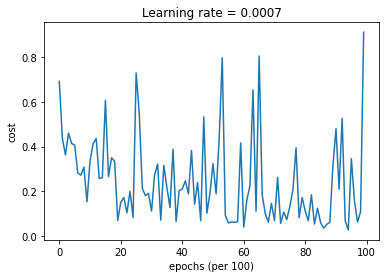

Accuracy: 0.9274725274725272


In [10]:
layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = model(X_train, y_train, layers_dims, optimizer="gd")

# # Predict
predictions = predict(X_train, y_train, parameters)

In [11]:
predictions = predict(X_test, y_test, parameters)

Accuracy: 0.9473684210526316


<AxesSubplot:>

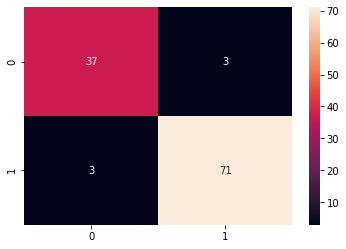

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
test_y = y_test.reshape(y_test.shape[1],1)
test_pred = predictions.reshape(predictions.shape[1],1)
cm = confusion_matrix(test_y, test_pred)
sns.heatmap(cm,annot=True)

# Mini batch with momentum

Cost after epoch 0: 5.649302
Cost after epoch 1000: 0.630978
Cost after epoch 2000: 0.620237
Cost after epoch 3000: 0.617755
Cost after epoch 4000: 0.688064
Cost after epoch 5000: 0.546380
Cost after epoch 6000: 0.830381
Cost after epoch 7000: 0.688256
Cost after epoch 8000: 0.545623
Cost after epoch 9000: 0.759649


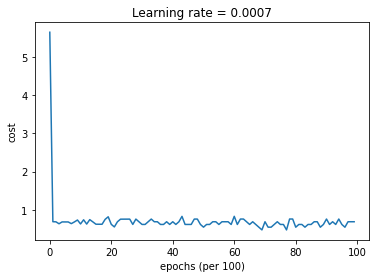

Accuracy: 0.6219780219780218


In [13]:
layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = model(X_train, y_train, layers_dims, beta=0.9, optimizer="momentum")

# Predict
predictions = predict(X_train, y_train, parameters)

In [14]:
predictions = predict(X_test,y_test, parameters)

Accuracy: 0.6491228070175439


<AxesSubplot:>

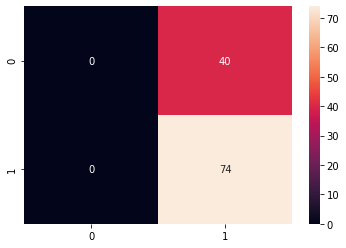

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
test_y = y_test.reshape(y_test.shape[1],1)
test_pred = predictions.reshape(predictions.shape[1],1)
cm = confusion_matrix(test_y, test_pred)
sns.heatmap(cm,annot=True)

# Adam optimization

Cost after epoch 0: 16.487387
Cost after epoch 1000: 0.111642
Cost after epoch 2000: 0.011289
Cost after epoch 3000: 0.035812
Cost after epoch 4000: 0.005875
Cost after epoch 5000: 0.008205
Cost after epoch 6000: 0.001061
Cost after epoch 7000: 0.004662
Cost after epoch 8000: 0.003980
Cost after epoch 9000: 0.129492


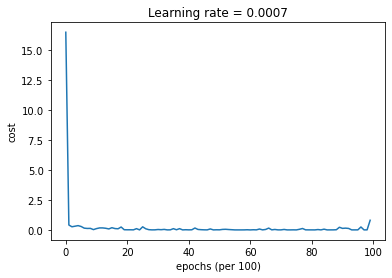

Accuracy: 0.9868131868131864


In [16]:
layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = model(X_train, y_train, layers_dims, optimizer="adam")

# Predict
predictions = predict(X_train, y_train, parameters)

In [17]:
predictions = predict(X_test, y_test, parameters)

Accuracy: 0.9912280701754386


<AxesSubplot:>

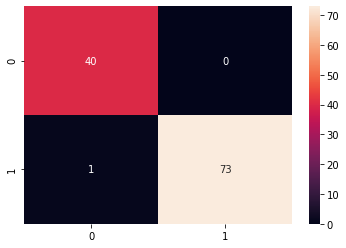

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
test_y = y_test.reshape(y_test.shape[1],1)
test_pred = predictions.reshape(predictions.shape[1],1)
cm = confusion_matrix(test_y, test_pred)
sns.heatmap(cm,annot=True)